In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("../data/temp_electricity.csv")

In [3]:
df.head()

Datetime  Consommation               Regions               Nature  year  \
0  2020-01-01      403787.0  Auvergne-Rhône-Alpes  Données définitives  2020   
1  2020-01-02      443531.0  Auvergne-Rhône-Alpes  Données définitives  2020   
2  2020-01-03      434626.0  Auvergne-Rhône-Alpes  Données définitives  2020   
3  2020-01-04      395169.0  Auvergne-Rhône-Alpes  Données définitives  2020   
4  2020-01-05      400169.0  Auvergne-Rhône-Alpes  Données définitives  2020   

   month  day  ALLSKY_SFC_SW_DWN  CLRSKY_SFC_SW_DWN  GWETROOT  ...      PS  \
0      1    1              5.494              6.860     0.768  ...  97.706   
1      1    2              4.532              6.448     0.768  ...  97.484   
2      1    3              3.846              6.454     0.766  ...  97.456   
3      1    4              4.684              7.002     0.766  ...  97.844   
4      1    5              6.516              7.210     0.766  ...  97.850   

    QV2M    RH2M    T2M  T2M_MAX  T2M_MIN  T2M_RANGE   WD10M  WS10M   WS2M  
0  3.690  87.752  0.940    4.552   -0.758      5.310  291.10  1.938  1.168  
1  4.194  87.350  2.642    7.794   -0.600      8.394  175.38  3.454  2.140  
2  4.872  89.086  4.570    8.598    1.944      6.654  196.00  2.976  1.748  
3  4.846  94.106  3.732    7.036   -0.244      7.280  276.04  3.874  2.512  
4  3.932  91.162  1.246    5.364   -1.542      6.906  236.76  3.654  2.338  

[5 rows x 22 columns]

In [4]:
df.columns

Index(['Datetime', 'Consommation', 'Regions', 'Nature', 'year', 'month', 'day',
       'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'GWETROOT', 'GWETTOP',
       'PRECTOTCORR', 'PS', 'QV2M', 'RH2M', 'T2M', 'T2M_MAX', 'T2M_MIN',
       'T2M_RANGE', 'WD10M', 'WS10M', 'WS2M'],
      dtype='object')

### Data Cleaning and Preprocessing 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21924 entries, 0 to 21923
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Datetime           21924 non-null  object 
 1   Consommation       21924 non-null  float64
 2   Regions            21924 non-null  object 
 3   Nature             21924 non-null  object 
 4   year               21924 non-null  int64  
 5   month              21924 non-null  int64  
 6   day                21924 non-null  int64  
 7   ALLSKY_SFC_SW_DWN  21924 non-null  float64
 8   CLRSKY_SFC_SW_DWN  21924 non-null  float64
 9   GWETROOT           21924 non-null  float64
 10  GWETTOP            21924 non-null  float64
 11  PRECTOTCORR        21924 non-null  float64
 12  PS                 21924 non-null  float64
 13  QV2M               21924 non-null  float64
 14  RH2M               21924 non-null  float64
 15  T2M                21924 non-null  float64
 16  T2M_MAX            219

<Axes: >

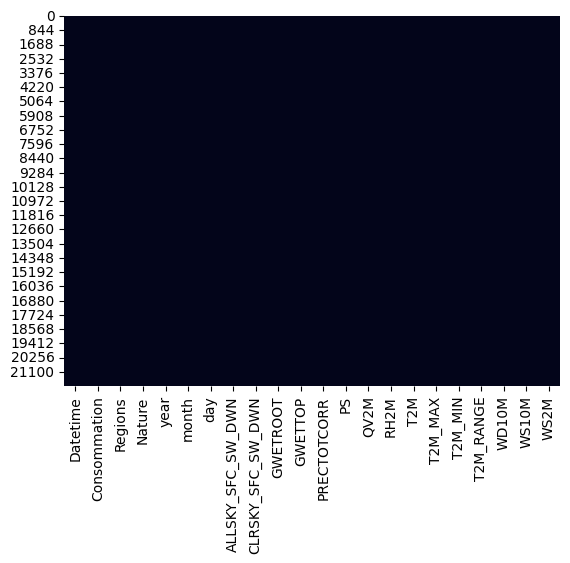

In [6]:
sns.heatmap(df.isnull(), cbar=False)

In [7]:
df["Datetime"] = pd.to_datetime(df["Datetime"])

df["year"] = df["Datetime"].dt.year
df["month"] = df["Datetime"].dt.month
df["dayofweek"] = df["Datetime"].dt.dayofweek  # 0=Mon
df["is_weekend"] = df["dayofweek"].isin([5, 6]).astype(int)

In [8]:
df[["Consommation","T2M","T2M_MAX","ALLSKY_SFC_SW_DWN","T2M_MIN","PRECTOTCORR","RH2M","WD10M","PS","WS10M"]].describe()

Consommation           T2M       T2M_MAX  ALLSKY_SFC_SW_DWN  \
count   21924.000000  21924.000000  21924.000000       21924.000000   
mean   204433.967843     12.442940     16.998125          12.961568   
std     94293.008281      6.667029      7.493208           7.852625   
min     58376.000000     -6.362000     -2.690000           0.700000   
25%    125892.500000      7.517500     11.288000           5.876000   
50%    191000.500000     12.108000     16.614000          12.028000   
75%    262712.500000     17.610500     22.530500          19.176000   
max    624804.000000     32.044000     41.378000          31.250000   

            T2M_MIN   PRECTOTCORR          RH2M         WD10M            PS  \
count  21924.000000  21924.000000  21924.000000  21924.000000  21924.000000   
mean       8.255299      2.075674     79.604627    193.231263     99.084231   
std        5.905712      3.444000     11.288745     84.581202      1.838204   
min      -10.242000      0.000000     29.186000      2.560000     93.032000   
25%        4.034000      0.058000     72.921500    133.655000     97.451500   
50%        8.176000      0.508000     81.229000    209.620000     99.500000   
75%       12.754000      2.678000     88.384000    256.380000    100.578000   
max       25.024000     54.108000     99.096000    358.400000    103.672000   

              WS10M  
count  21924.000000  
mean       4.382351  
std        1.942625  
min        0.996000  
25%        2.933500  
50%        3.960000  
75%        5.418000  
max       15.700000

#### Consumption by region 

In [9]:
df.groupby("Regions")[["Consommation", "T2M"]].describe()

Consommation                                         \
                               count           mean           std       min   
Regions                                                                       
Auvergne-Rhône-Alpes          1827.0  342596.859880  64746.136845  234684.0   
Bourgogne-Franche-Comté       1827.0  109851.909141  22470.589562   67161.0   
Bretagne                      1827.0  119285.205802  27838.740250   72725.0   
Centre-Val de Loire           1827.0   97308.937603  22967.548838   58376.0   
Grand-Est                     1827.0  234006.535851  42286.268818  154087.0   
Hauts-de-France               1827.0  258629.059661  42353.482796  144157.0   
Ile-de-France                 1827.0  359618.373837  82920.332118  216397.0   
Normandie                     1827.0  144454.072797  30962.329042   64669.0   
Nouvelle-Aquitaine            1827.0  228669.166940  47832.733907  156845.0   
Occitanie                     1827.0  201205.998358  41757.643674  137804.0   
PACA                          1827.0  215320.491516  35987.132874  128984.0   
Pays-de-la-Loire              1827.0  142261.002737  33549.924484   58845.0   

                                                                    T2M  \
                              25%       50%       75%       max   count   
Regions                                                                   
Auvergne-Rhône-Alpes     297004.0  321116.0  388601.0  532256.0  1827.0   
Bourgogne-Franche-Comté   94505.5  103790.0  125636.0  176522.0  1827.0   
Bretagne                 100457.5  109461.0  139713.0  230009.0  1827.0   
Centre-Val de Loire       79503.5   89968.0  113728.5  174310.0  1827.0   
Grand-Est                203241.0  224851.0  263915.0  358770.0  1827.0   
Hauts-de-France          227054.0  248745.0  289640.0  397412.0  1827.0   
Ile-de-France            294165.0  336197.0  419749.5  624804.0  1827.0   
Normandie                120594.5  136120.0  167809.0  281907.0  1827.0   
Nouvelle-Aquitaine       193791.0  210637.0  260424.0  396253.0  1827.0   
Occitanie                169991.0  187339.0  227507.0  364705.0  1827.0   
PACA                     187152.0  205260.0  238816.0  346351.0  1827.0   
Pays-de-la-Loire         120918.0  131634.0  164698.5  261579.0  1827.0   

                                                                            \
                              mean       std    min    25%     50%     75%   
Regions                                                                      
Auvergne-Rhône-Alpes     11.899557  7.690190 -5.580  5.643  11.550  18.154   
Bourgogne-Franche-Comté  11.335125  7.254134 -6.326  5.725  10.954  17.306   
Bretagne                 12.599182  5.174079 -1.970  8.889  12.402  16.727   
Centre-Val de Loire      12.368478  6.848619 -4.312  7.344  12.054  17.843   
Grand-Est                10.931642  7.193575 -6.362  5.439  10.556  16.942   
Hauts-de-France          11.290617  5.834509 -5.072  6.973  11.114  16.193   
Ile-de-France            11.823184  6.562364 -5.264  6.934  11.574  17.182   
Normandie                11.997681  5.437600 -2.726  7.920  11.770  16.371   
Nouvelle-Aquitaine       13.630246  6.809904 -2.230  8.476  13.222  19.118   
Occitanie                14.089305  6.761375 -2.768  8.641  13.422  19.599   
PACA                     14.610134  6.673333  0.494  9.020  13.760  20.429   
Pays-de-la-Loire         12.740125  6.206247 -3.046  8.316  12.556  17.673   

                                 
                            max  
Regions                          
Auvergne-Rhône-Alpes     30.648  
Bourgogne-Franche-Comté  28.456  
Bretagne                 28.590  
Centre-Val de Loire      30.280  
Grand-Est                27.552  
Hauts-de-France          25.956  
Ile-de-France            29.552  
Normandie                26.766  
Nouvelle-Aquitaine       32.044  
Occitanie                31.172  
PACA                     29.672  
Pays-de-la-Loire         30.508

## Visualization 


### Daily trend

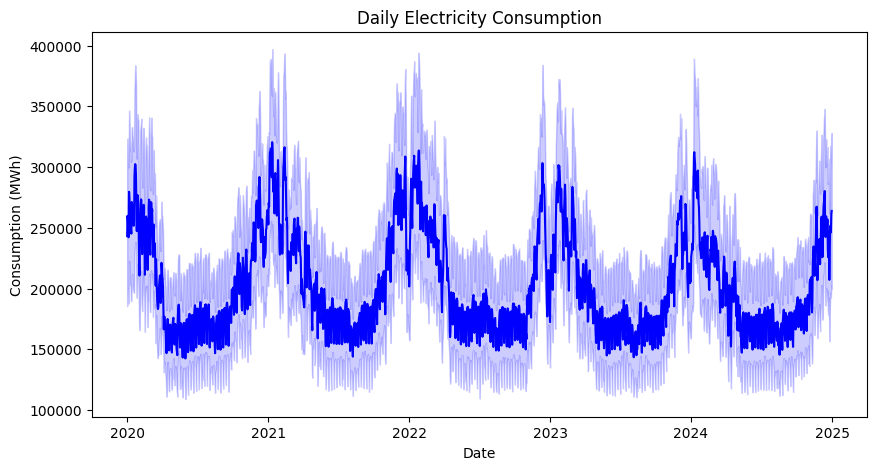

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Datetime", y="Consommation", color='blue')
plt.title("Daily Electricity Consumption")
plt.xlabel("Date")
plt.ylabel("Consumption (MWh)")

plt.savefig("../figure/seasonal_pattern.png", dpi=300)
plt.show()

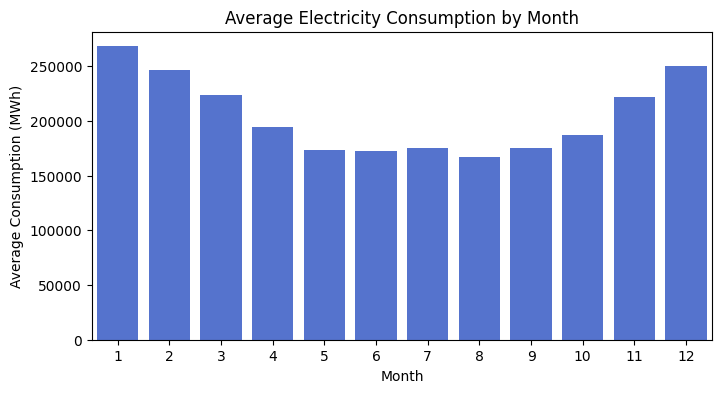

In [11]:
monthly_avg = df.groupby("month")["Consommation"].mean()
plt.figure(figsize=(8,4))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, color="royalblue")
plt.title("Average Electricity Consumption by Month")
plt.xlabel("Month")
plt.ylabel("Average Consumption (MWh)")
plt.savefig("../figure/monthly_avg_consummation.png", dpi=300)
plt.show()


/tmp/ipykernel_10018/4116756351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Regions", y="Consommation", palette="coolwarm")


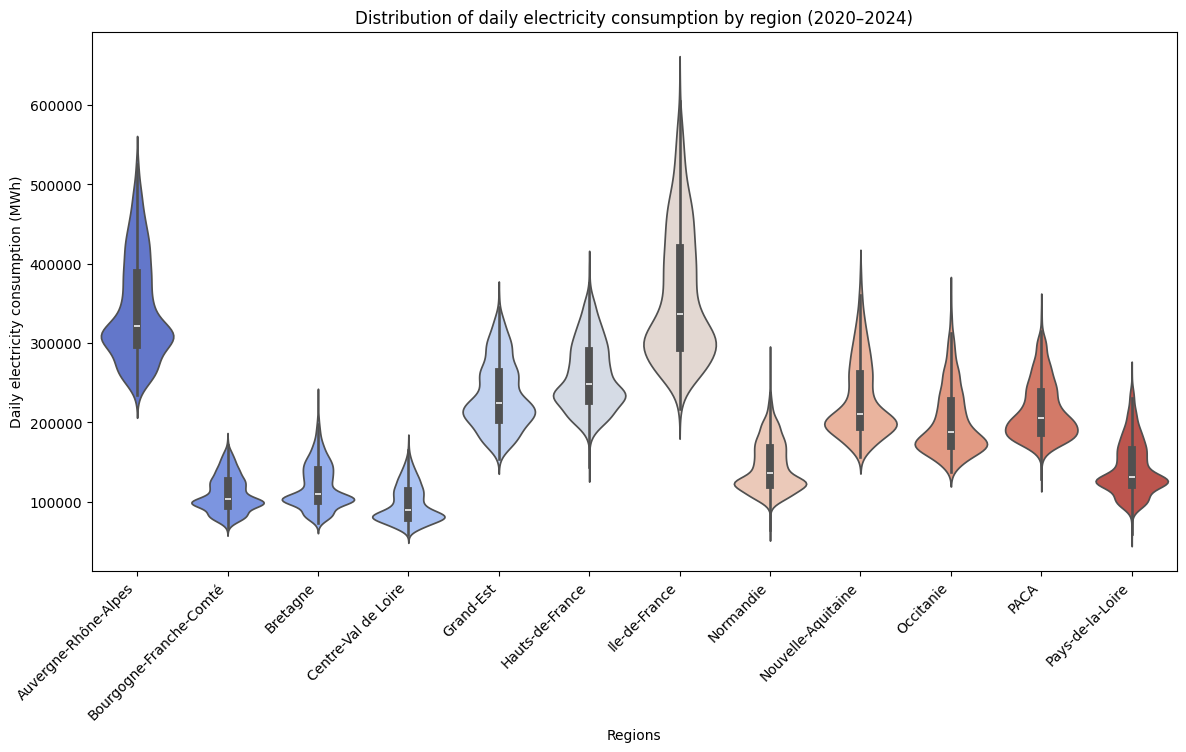

In [12]:
plt.figure(figsize=(14, 7))
sns.violinplot(data=df, x="Regions", y="Consommation", palette="coolwarm")
plt.ylabel("Daily electricity consumption (MWh)")
plt.title("Distribution of daily electricity consumption by region (2020–2024)")
plt.xticks(rotation=45, ha="right")
plt.savefig("../figure/consummation_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

/tmp/ipykernel_10018/1043240118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Regions", y="T2M", palette="coolwarm")


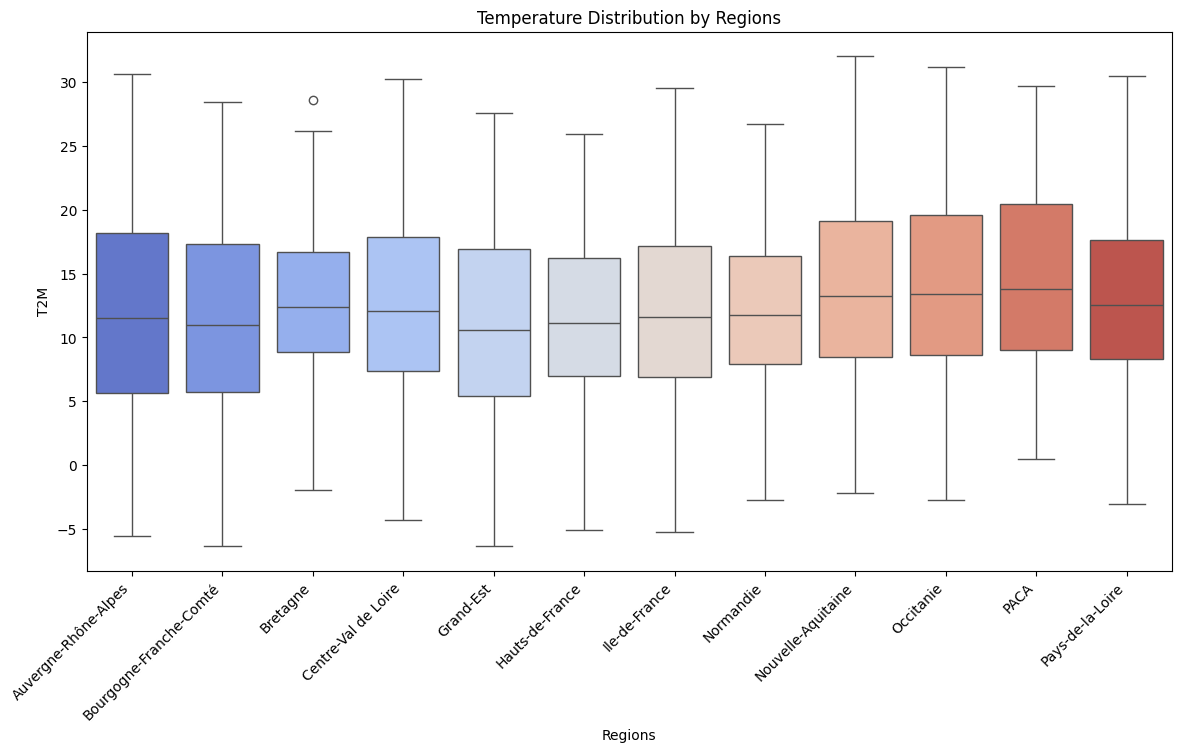

In [13]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x="Regions", y="T2M", palette="coolwarm")
plt.title("Temperature Distribution by Regions")
plt.xticks(rotation=45, ha="right")
plt.savefig("../figure/temperature_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

In [14]:
df = df.copy()

def season_from_month(m):
    if m in [12, 1, 2]:
        return "Winter"
    elif m in [3, 4, 5]:
        return "Spring"
    elif m in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df["Season"] = df["month"].apply(season_from_month)

seasonal_avg = (
    df[df["Season"].isin(["Winter", "Summer"])]
    .groupby(["Regions", "Season"])["Consommation"]
    .mean()
    .unstack()
)

seasonal_avg["Winter/Summer ratio"] = seasonal_avg["Winter"] / seasonal_avg["Summer"]
seasonal_avg = seasonal_avg.sort_values("Winter/Summer ratio", ascending=False)

seasonal_avg


Season                          Summer         Winter  Winter/Summer ratio
Regions                                                                   
Ile-de-France            283112.178261  461888.303097             1.631467
Centre-Val de Loire       77584.306522  125757.194690             1.620910
Bretagne                  95992.223913  153754.004425             1.601734
Pays-de-la-Loire         115074.689130  182289.480088             1.584097
Normandie                116083.104348  182684.247788             1.573737
Bourgogne-Franche-Comté   90224.204348  136801.661504             1.516241
Nouvelle-Aquitaine       195475.106522  289234.971239             1.479651
Auvergne-Rhône-Alpes     291115.934783  423956.331858             1.456314
Occitanie                179133.715217  255156.159292             1.424389
Grand-Est                197628.036957  280775.716814             1.420728
Hauts-de-France          218328.280435  307269.676991             1.407375
PACA                     201551.210870  262814.230088             1.303958

### Relationship between temperature and consumption

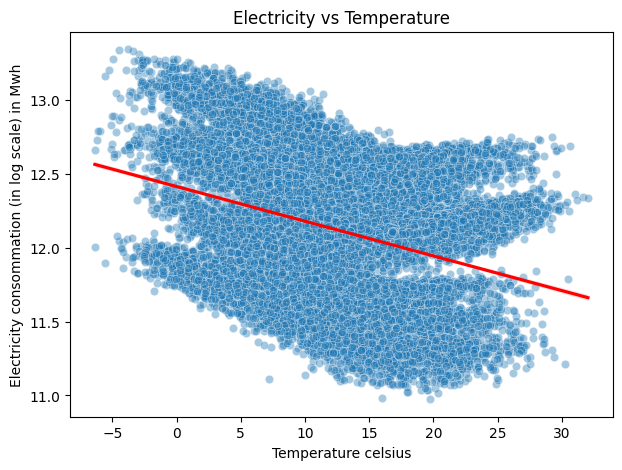

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x="T2M",y=np.log(df["Consommation"]),alpha = 0.4)
sns.regplot(data=df, x="T2M", y=np.log(df["Consommation"]), scatter=False, color='red')
plt.title("Electricity vs Temperature")
plt.xlabel("Temperature celsius")
plt.ylabel("Electricity consommation (in log scale) in Mwh")
plt.savefig("../figure/ele_vs_consommation.png", dpi=300)
plt.show()

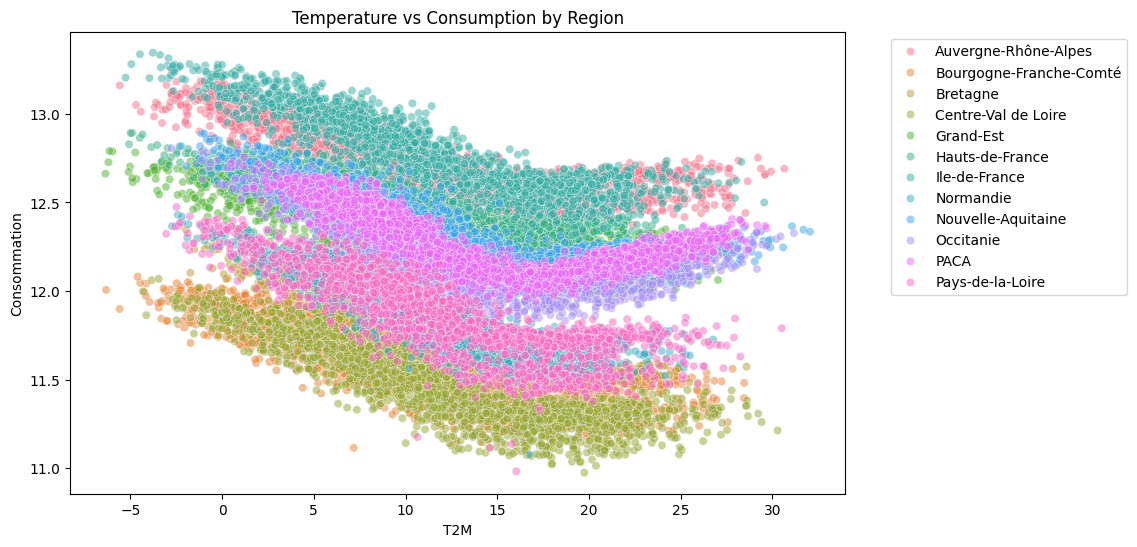

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="T2M", y=np.log(df["Consommation"]), hue="Regions", data=df, alpha=0.5)
plt.title("Temperature vs Consumption by Region")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Solar Radiation and Consommation

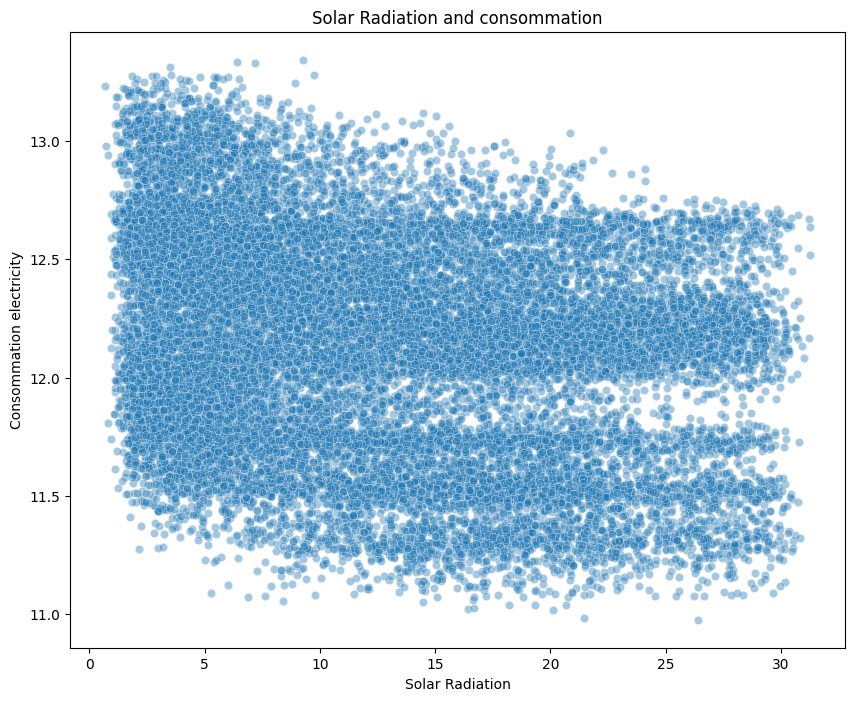

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(df, x ="ALLSKY_SFC_SW_DWN", y = np.log(df["Consommation"]), alpha = 0.4)
plt.title("Solar Radiation and consommation")
plt.xlabel("Solar Radiation")
plt.ylabel("Consommation electricity")
plt.show()

### Humidity vs consommation

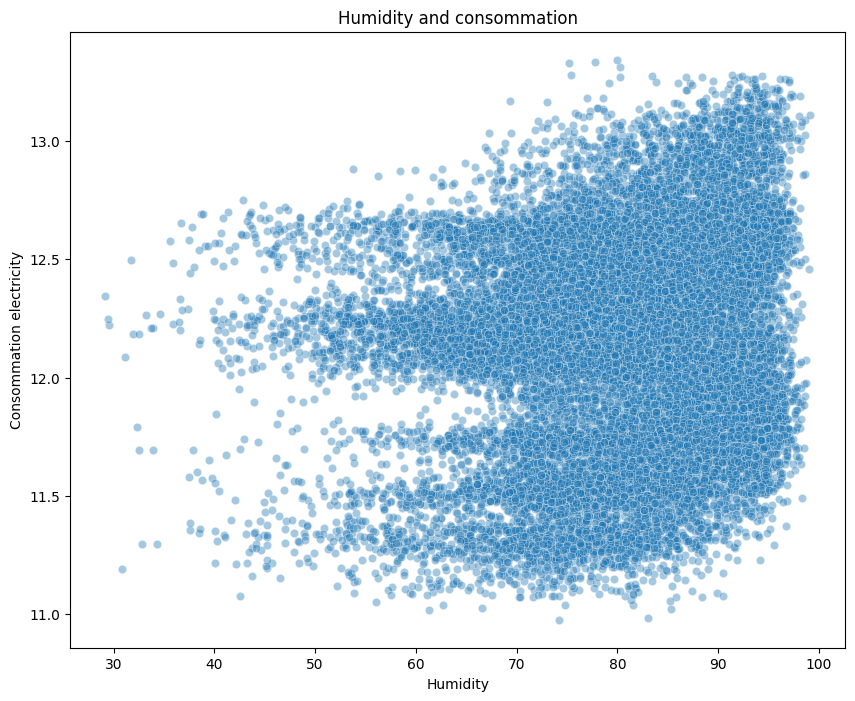

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(df, x ="RH2M", y = np.log(df["Consommation"]), alpha = 0.4)
plt.title("Humidity and consommation")
plt.xlabel("Humidity")
plt.ylabel("Consommation electricity")
plt.show()

In [18]:
labels = {
    "T2M": "Temperature (°C)",
    "RH2M": "Humidity (%)",
    "WS10M": "Wind Speed (m/s)",
    "ALLSKY_SFC_SW_DWN": "Solar Radiation (W/m²)",
    "PRECTOTCORR": "Precipitation (mm/day)",
    "PS":"Pressure"
}


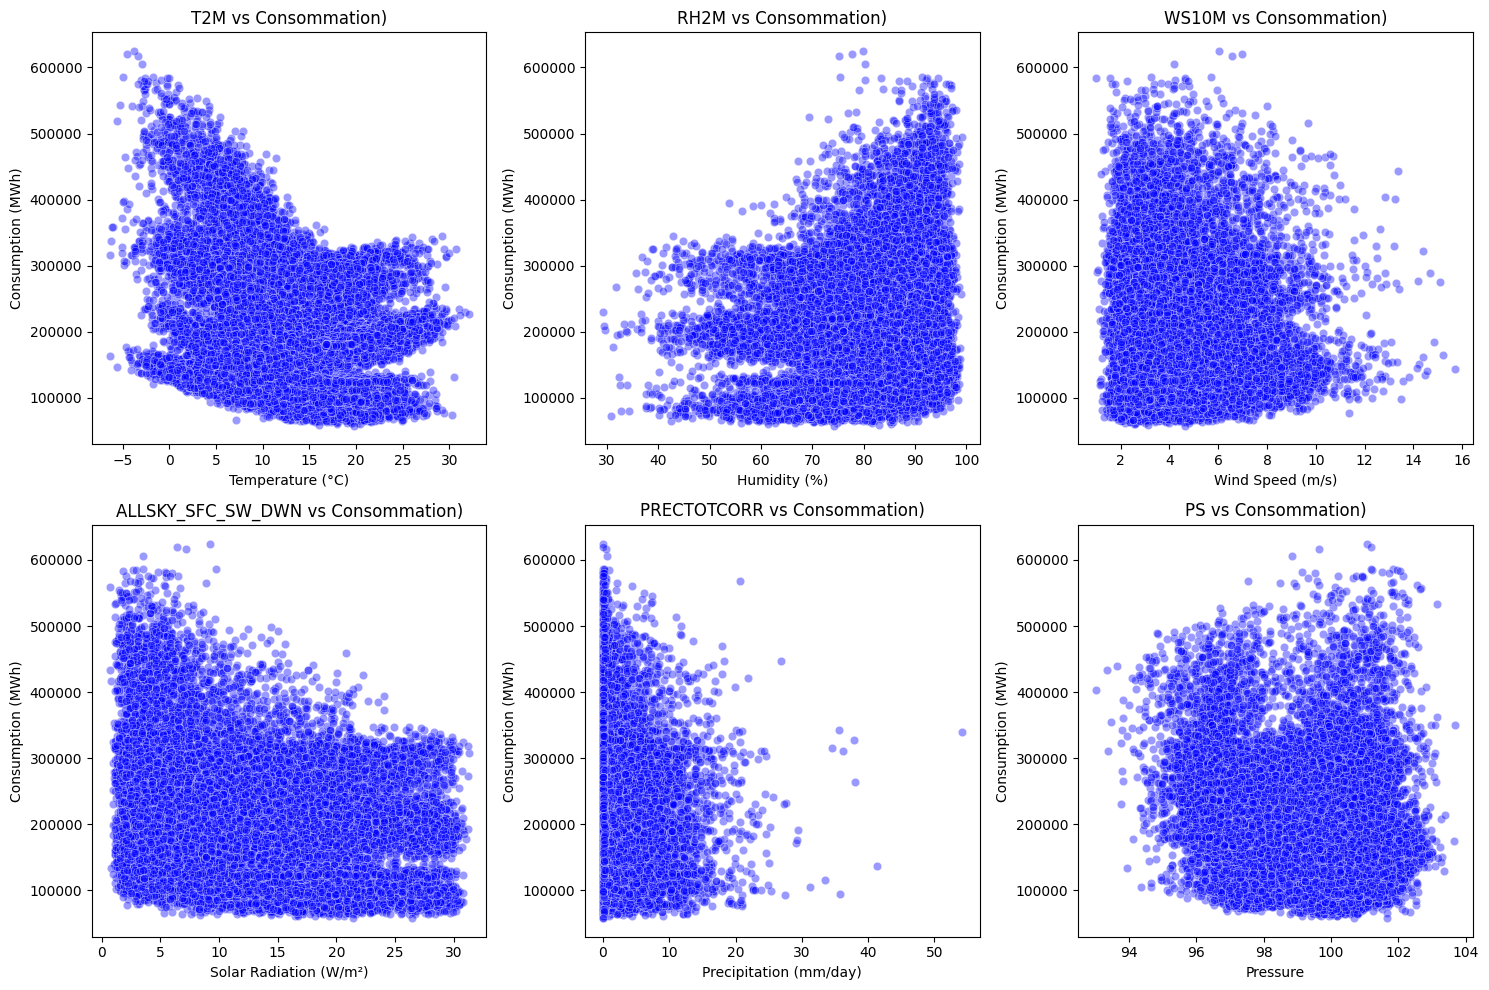

In [19]:
weather_vars = ["T2M", "RH2M", "WS10M", "ALLSKY_SFC_SW_DWN", "PRECTOTCORR","PS"]
plt.figure(figsize=(15, 10))

for i, var in enumerate(weather_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=var, y="Consommation", alpha=0.4, color='blue')
    plt.title(f"{var} vs Consommation)")
    plt.xlabel(labels.get(var, var))
    plt.ylabel("Consumption (MWh)")

plt.tight_layout()
plt.show()


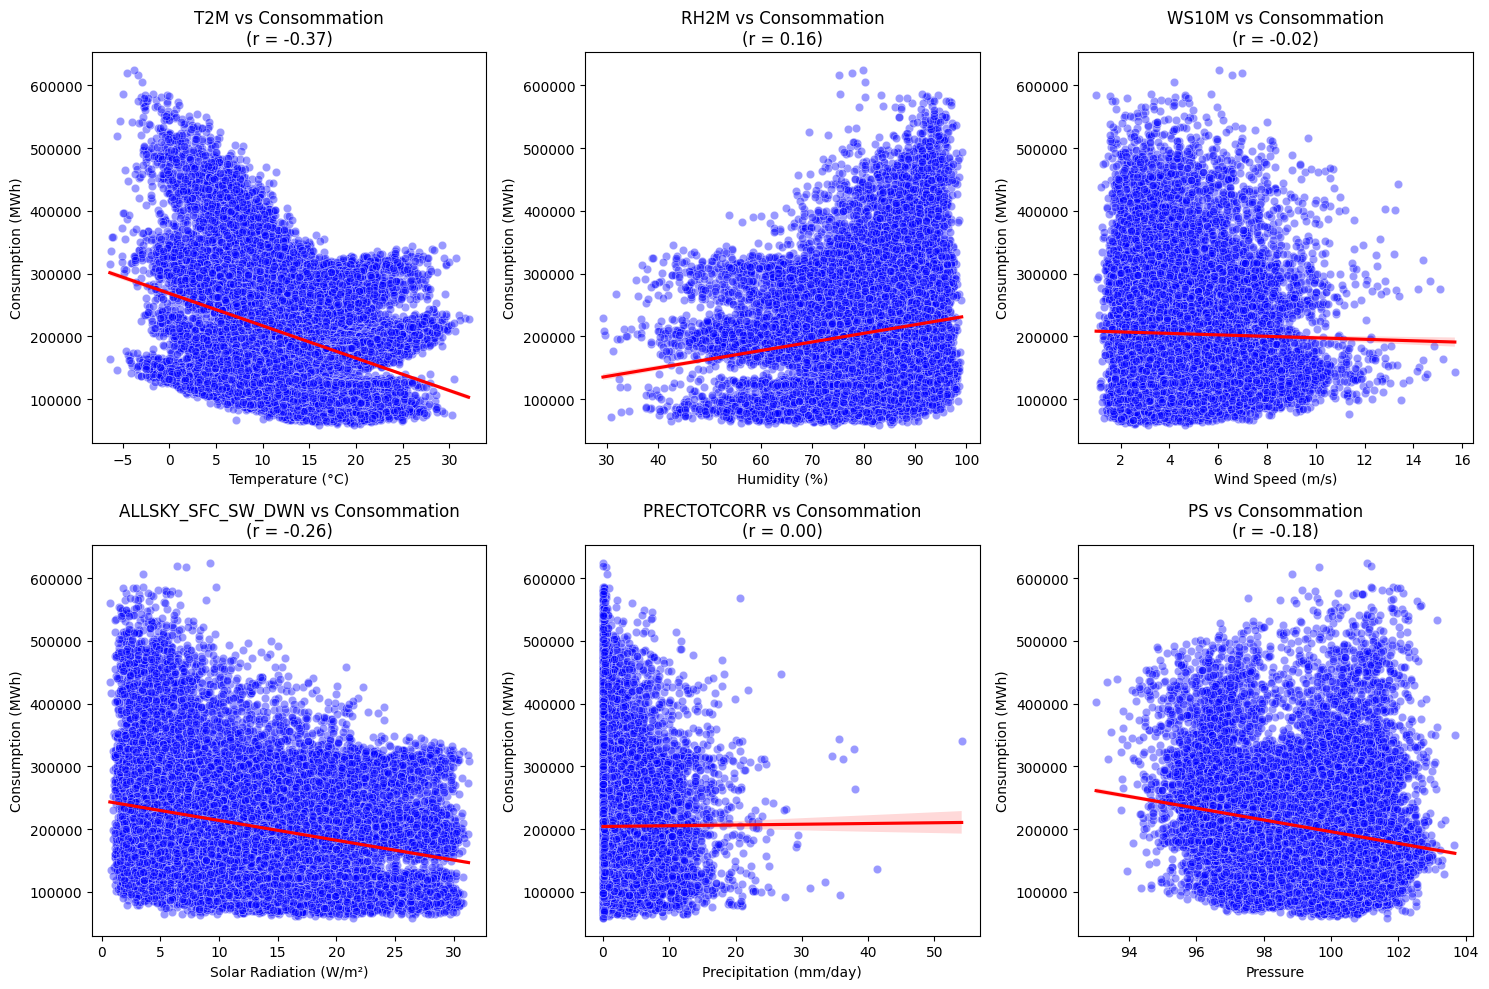

In [21]:
plt.figure(figsize=(15, 10))

for i, var in enumerate(weather_vars, 1):
    plt.subplot(2, 3, i)
    corr = df["Consommation"].corr(df[var])
    
    sns.scatterplot(data=df, x=var, y="Consommation", alpha=0.4, color='blue')
    sns.regplot(data=df, x=var, y="Consommation", scatter=False, color='red')
    
    plt.title(f"{var} vs Consommation\n(r = {corr:.2f})")
    plt.xlabel(labels.get(var, var))
    plt.ylabel("Consumption (MWh)")

plt.tight_layout()
plt.show()


### Year-by-year comparison (consumption and temperature)

In [22]:
yearly = (
    df.groupby(["year", "Regions"])[["Consommation", "T2M"]]
      .mean()
      .reset_index()
)

yearly.head()

year                  Regions   Consommation        T2M
0  2020     Auvergne-Rhône-Alpes  337754.945355  12.024459
1  2020  Bourgogne-Franche-Comté  109906.000000  11.547295
2  2020                 Bretagne  119903.934426  12.554311
3  2020      Centre-Val de Loire   99503.428962  12.572541
4  2020                Grand-Est  232616.907104  11.082683

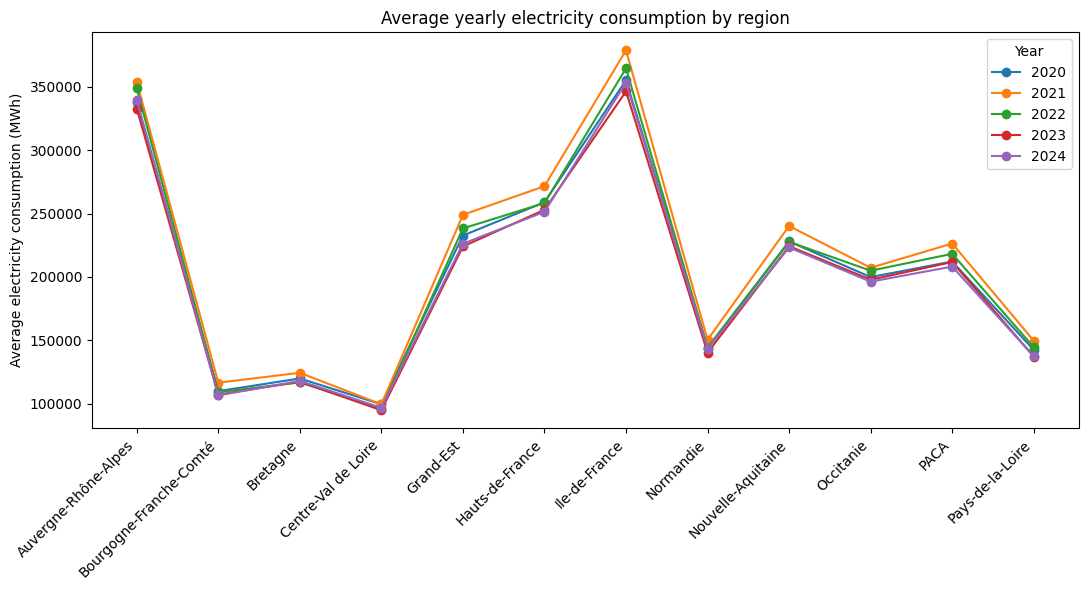

In [23]:
plt.figure(figsize=(11,6))

for year in sorted(yearly["year"].unique()):
    sub = yearly[yearly["year"] == year].sort_values("Regions")
    plt.plot(sub["Regions"], sub["Consommation"], marker="o", label=str(year))

plt.xticks(rotation=45, ha="right")
plt.ylabel("Average electricity consumption (MWh)")
plt.title("Average yearly electricity consumption by region")
plt.legend(title="Year")
plt.tight_layout()

plt.savefig("../figure/yearly_consumption_by_region.png", dpi=300)
plt.show()

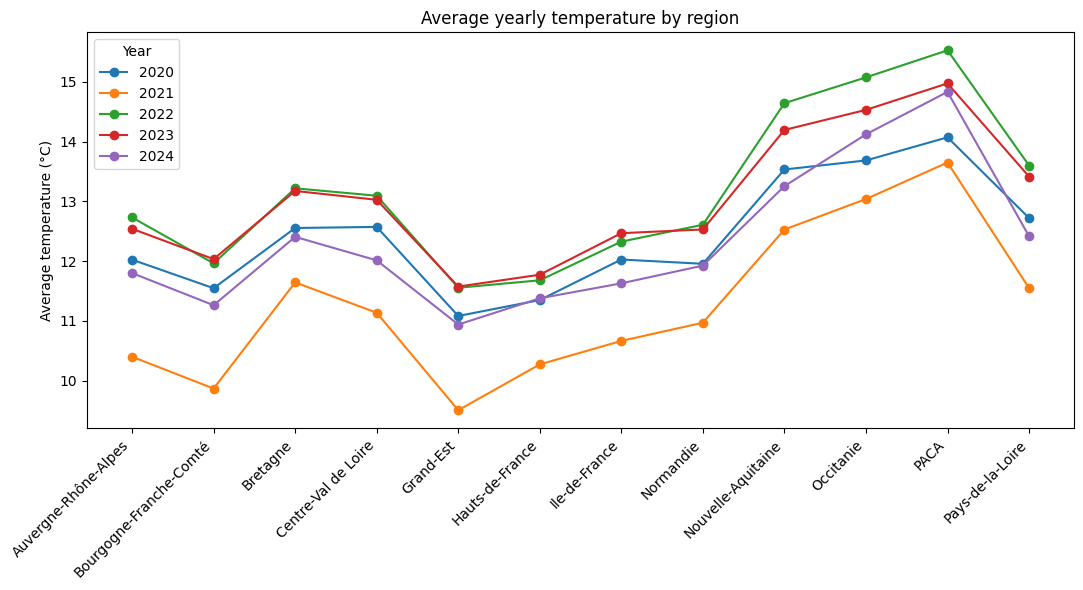

In [24]:
plt.figure(figsize=(11,6))

for year in sorted(yearly["year"].unique()):
    sub = yearly[yearly["year"] == year].sort_values("Regions")
    plt.plot(sub["Regions"], sub["T2M"], marker="o", label=str(year))

plt.xticks(rotation=45, ha="right")
plt.ylabel("Average temperature (°C)")
plt.title("Average yearly temperature by region")
plt.legend(title="Year")
plt.tight_layout()

plt.savefig("../figure/yearly_temperature_by_region.png", dpi=300)
plt.show()

### Regional comparison

### Mean comparison by regions

/tmp/ipykernel_10018/3021559483.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_mean.values, y=region_mean.index, palette="viridis")


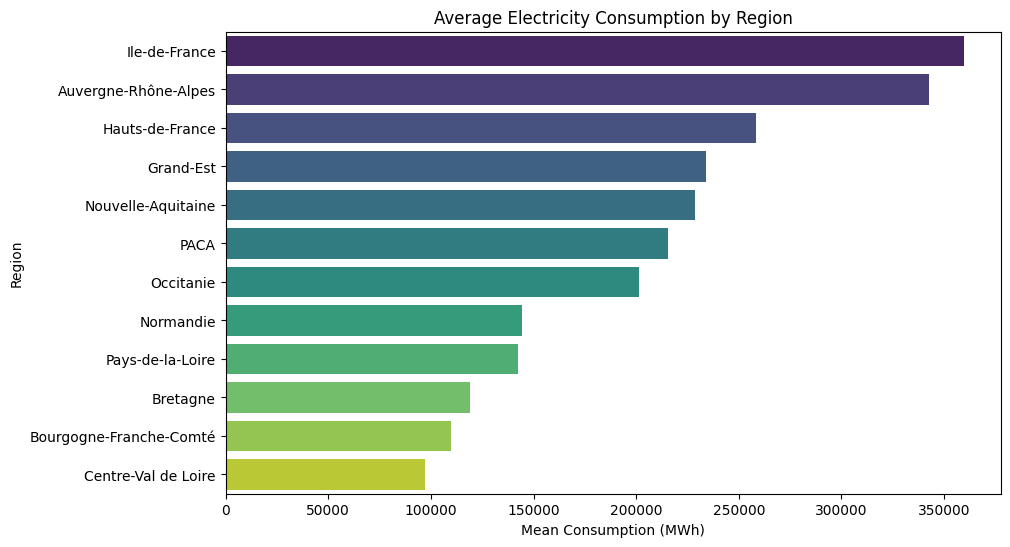

In [25]:
region_mean = df.groupby("Regions")["Consommation"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=region_mean.values, y=region_mean.index, palette="viridis")
plt.title("Average Electricity Consumption by Region")
plt.xlabel("Mean Consumption (MWh)")
plt.ylabel("Region")

plt.savefig("../figure/avg_ele_consumption_region.png", dpi=300)
plt.show()
plt.show()


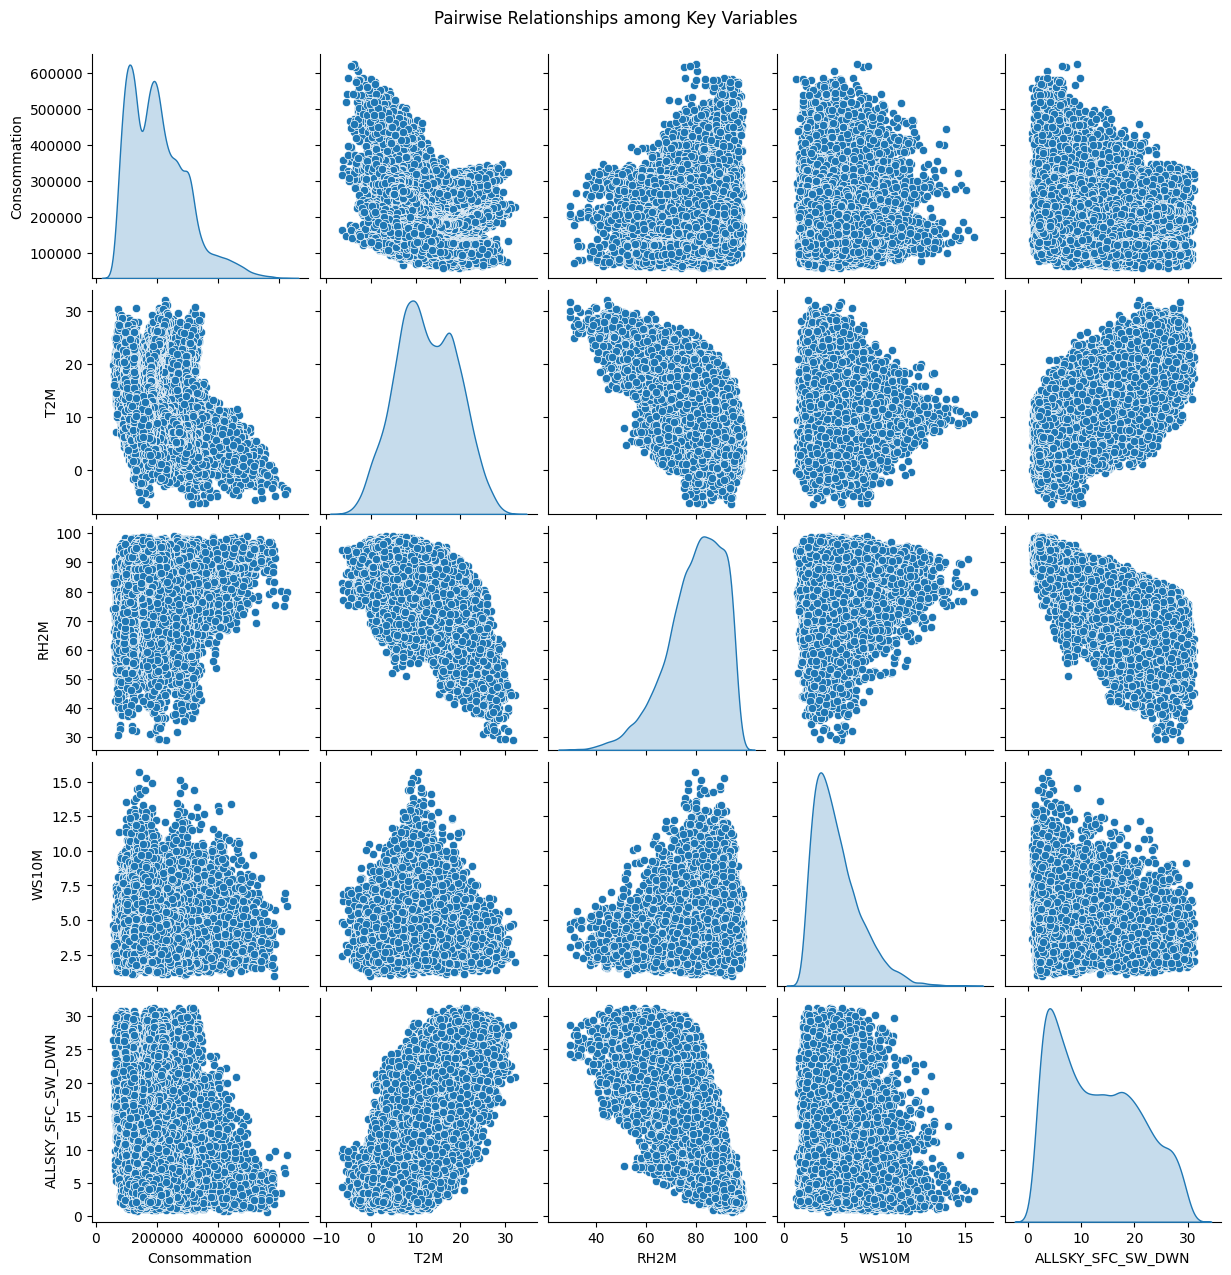

In [26]:
sns.pairplot(df[['Consommation', 'T2M', 'RH2M', 'WS10M', 'ALLSKY_SFC_SW_DWN']], diag_kind='kde')
plt.suptitle("Pairwise Relationships among Key Variables", y=1.02)
plt.show()

### Correlation heatmap

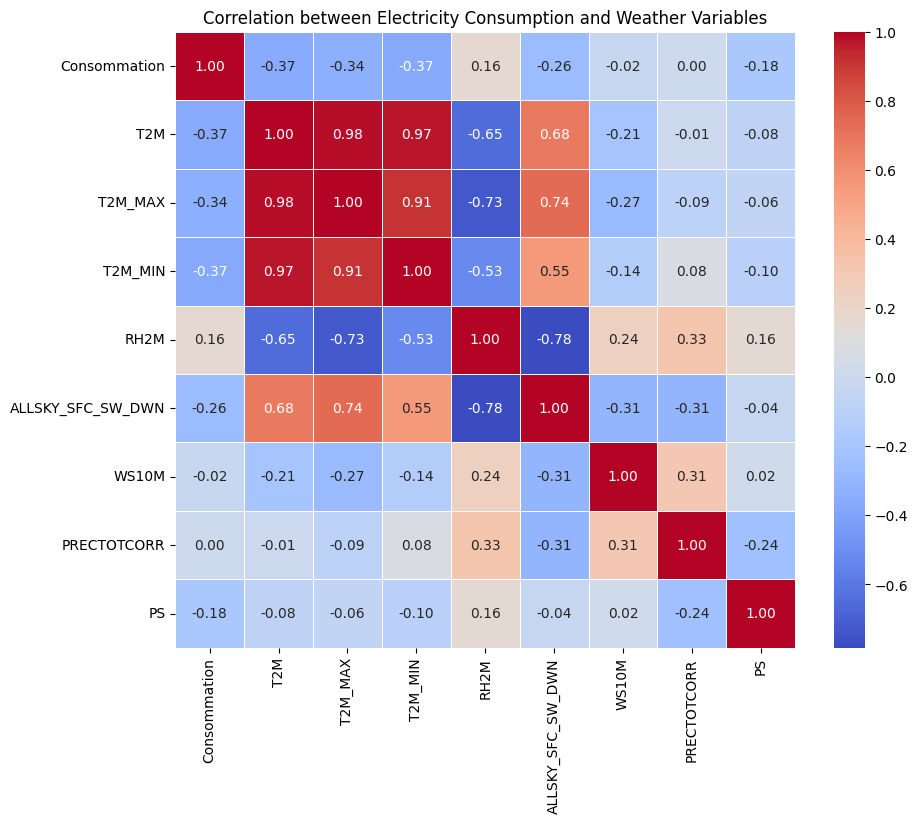

In [27]:
plt.figure(figsize=(10,8))
corr = df[['Consommation','T2M','T2M_MAX','T2M_MIN','RH2M','ALLSKY_SFC_SW_DWN','WS10M','PRECTOTCORR',"PS"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation between Electricity Consumption and Weather Variables")
plt.show()


### Econometrics

In [ ]:
df_reg = df[["Consommation", "T2M", "Regions"]]
m1 = smf.ols("Consommation ~ T2M", data=df_reg).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:           Consommation   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     3371.
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        09:34:44   Log-Likelihood:            -2.8066e+05
No. Observations:               21924   AIC:                         5.613e+05
Df Residuals:                   21922   BIC:                         5.613e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.687e+05   1255.375    214.023      0.0

In [29]:
m2 = smf.ols("Consommation ~ T2M + C(Regions)", data=df_reg).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:           Consommation   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 1.669e+04
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        09:34:45   Log-Likelihood:            -2.5683e+05
No. Observations:               21924   AIC:                         5.137e+05
Df Residuals:                   21911   BIC:                         5.138e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [30]:
m2.params

Intercept                                402935.350283
C(Regions)[T.Bourgogne-Franche-Comté]   -235606.984516
C(Regions)[T.Bretagne]                  -219764.097245
C(Regions)[T.Centre-Val de Loire]       -242910.184172
C(Regions)[T.Grand-Est]                 -113498.280549
C(Regions)[T.Hauts-de-France]            -87055.518178
C(Regions)[T.Ile-de-France]               16634.257265
C(Regions)[T.Normandie]                 -197645.230564
C(Regions)[T.Nouvelle-Aquitaine]        -105151.970934
C(Regions)[T.Occitanie]                 -130287.414065
C(Regions)[T.PACA]                      -113531.980804
C(Regions)[T.Pays-de-la-Loire]          -196073.630036
T2M                                       -5070.650292
dtype: float64

In [31]:
comparison = pd.DataFrame({
    "Model": ["Pooled OLS", "Region Fixed Effects"],
    "Beta_T2M": [m1.params["T2M"], m2.params["T2M"]],
    "R2": [m1.rsquared, m2.rsquared],
    "N": [int(m1.nobs), int(m2.nobs)]
})
comparison

Model     Beta_T2M        R2      N
0            Pooled OLS -5163.203258  0.133274  21924
1  Region Fixed Effects -5070.650292  0.901412  21924

# Model 

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Define target and features variables

#### We define the target Consommation and use meteorological inclueded calendar variables and the region as predictors.

In [33]:
# Calendar features
df["month"] = df["Datetime"].dt.month
df["dayofweek"] = df["Datetime"].dt.dayofweek
df["is_weekend"] = df["dayofweek"].isin([5, 6]).astype(int)
df["saison"] = df["month"] % 12 // 3 # 0=winter, 1 =spring, 2=summer, 3=autumn 
# Numerical features
num_features = [
    "ALLSKY_SFC_SW_DWN","CLRSKY_SFC_SW_DWN","GWETROOT","GWETTOP",
    "PRECTOTCORR","PS","QV2M","RH2M","T2M","T2M_MAX","T2M_MIN",
    "T2M_RANGE","WD10M","WS10M","WS2M",
    "month","dayofweek","is_weekend","saison"
]
# Categorical feature 
cat_features = ["Regions"]

# Target 
target = "Consommation"

## Train / Test split and Preprocessing: feature selection, normalization and Column Transformer

### Instead of random split, we respect time: train on 2020–2023, test on 2024.

In [34]:
# Train dataset on 2020-2023
train = df[df["year"] < 2024].copy()
# Test dataset on 2024
test  = df[df["year"] == 2024].copy()
# Define target/Variable train or test
X_train = train[num_features + cat_features]
y_train = train[target]
X_test  = test[num_features + cat_features]
y_test  = test[target]
print(f"Uniquness row of train dataset year:{train["year"].unique()}")
print(f"Uniquess row of test dataset year {test["year"].unique()}")


Uniquness row of train dataset year:[2020 2021 2022 2023]
Uniquess row of test dataset year [2024]


## Calculate scores to identify the top scoring variables

In [35]:
train = df[df["year"] < 2024].copy()
corr = train[num_features].corr().abs()
# upper triangle of the corr matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
# drop vars highly correlated with another
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
print("Highly correlated variables to drop :", to_drop)



Highly correlated variables to drop : ['GWETTOP', 'T2M', 'T2M_MAX', 'T2M_MIN', 'WS2M']


In [36]:
# Numeric features
num_features = [c for c in num_features if c not in to_drop]
print("Numeric features:", num_features)

Numeric features: ['ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'GWETROOT', 'PRECTOTCORR', 'PS', 'QV2M', 'RH2M', 'T2M_RANGE', 'WD10M', 'WS10M', 'month', 'dayofweek', 'is_weekend', 'saison']


In [37]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features), # scale numerical
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)  # one-hot encode Regions
    ]
)

In [54]:
X_train_num = train[num_features]
y_train = train[target]

selector_all = SelectKBest(score_func=f_regression, k="all")
selector_all.fit(X_train_num, y_train)

scores = pd.DataFrame({
    "feature": num_features,
    "score": selector_all.scores_
}).sort_values("score", ascending=False)
scores

feature        score
5                QV2M  2424.056028
1   CLRSKY_SFC_SW_DWN  1799.930381
0   ALLSKY_SFC_SW_DWN  1363.412488
13             saison  1159.180583
4                  PS   622.230730
6                RH2M   600.334357
2            GWETROOT   320.871579
7           T2M_RANGE   289.907355
10              month   198.845023
12         is_weekend   194.291738
11          dayofweek   124.089290
8               WD10M    17.087248
9               WS10M    15.020472
3         PRECTOTCORR     0.966901

### Feature selection

In [39]:
# Selection of the top 10 variables based on highest scores
k = 10
top_num_features = scores.head(k)["feature"].tolist()
print("Top 10 numeric features:", top_num_features)


Top 10 numeric features: ['QV2M', 'CLRSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DWN', 'saison', 'PS', 'RH2M', 'GWETROOT', 'T2M_RANGE', 'month', 'is_weekend']


### Preprocessing

In [41]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), top_num_features), # scale numerical
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)  # one-hot encode Regions
    ]
)

In [42]:
feature_selector = SelectKBest(score_func=f_regression, k="all") 

## Pipeline Model

In [43]:
def pipeline(model):
    """
    Creation of a modeling pipeline for our analysis, in 3 steps : 
    1. Preprocess: Data transformation (Scaling for numerical and One-Hot Encoding for categorical features).
    2. Select: Feature selection using SelectKBest to keep the most significant predictors.
    3. Model: Implementation of the chosen regression algorithm (Linear, Ridge, or Decision Tree).
    """
    return Pipeline(steps=[
        ("preprocess", preprocess),
        ("select", feature_selector),
        ("model", model),
    ])

### 1. Model - Linear Regression

In [44]:
# Build pipeline
lin_model = pipeline(LinearRegression())
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
lin_model


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['QV2M', 'CLRSKY_SFC_SW_DWN',
                                                   'ALLSKY_SFC_SW_DWN',
                                                   'saison', 'PS', 'RH2M',
                                                   'GWETROOT', 'T2M_RANGE',
                                                   'month', 'is_weekend']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Regions'])])),
                ('select',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x7ff915edf380>)),
                ('model', LinearRegression())])

In [45]:
# Evaluation
lin_rmse = mean_squared_error(y_test, y_pred_lin)
lin_mae = mean_absolute_error(y_test, y_pred_lin)
lin_r2 = r2_score(y_test, y_pred_lin)

print("Linear Regression RMSE :", lin_rmse)
print("Linear Regression MAE :", lin_mae)
print("Linear Regression R-square  :", lin_r2)

Linear Regression RMSE : 605517771.0761194
Linear Regression MAE : 18334.108071996634
Linear Regression R-square  : 0.9270511074302357


### 2. Model - Ridge regression

In [46]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_model = pipeline(Ridge(alpha = 1))
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['QV2M', 'CLRSKY_SFC_SW_DWN',
                                                   'ALLSKY_SFC_SW_DWN',
                                                   'saison', 'PS', 'RH2M',
                                                   'GWETROOT', 'T2M_RANGE',
                                                   'month', 'is_weekend']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Regions'])])),
                ('select',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x7ff915edf380>)),
                ('model', Ridge(alpha=1))])

In [47]:
# Evaluating Ridge Regression
ridge_rmse = mean_squared_error(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

print("Ridge regression RMSE :",ridge_rmse)
print("Ridge regression MAE :", ridge_mae)
print("Ridge regression R-square :", ridge_r2)

Ridge regression RMSE : 605342167.48694
Ridge regression MAE : 18324.590834239847
Ridge regression R-square : 0.9270722630229761


### 3. Model - Decision Tree

In [48]:
#Build pipeline
tree_pipe = pipeline(
    DecisionTreeRegressor(
        max_depth=4,       
        random_state=0
    )
)
tree_pipe.fit(X_train, y_train)
y_pred_tree = tree_pipe.predict(X_test)
tree_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['QV2M', 'CLRSKY_SFC_SW_DWN',
                                                   'ALLSKY_SFC_SW_DWN',
                                                   'saison', 'PS', 'RH2M',
                                                   'GWETROOT', 'T2M_RANGE',
                                                   'month', 'is_weekend']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Regions'])])),
                ('select',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x7ff915edf380>)),
                ('model', DecisionTreeRegressor(max_depth=4, random_state=0))])

In [49]:
# Evaluation
tree_rmse = mean_squared_error(y_test, y_pred_tree)
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

print("Decision Tree RMSE :", tree_rmse)
print("Decision Tree MAE :", tree_mae)
print("Decision Tree R-sqaure  :", tree_r2)

Decision Tree RMSE : 2478432770.5739613
Decision Tree MAE : 42206.312647707804
Decision Tree R-sqaure  : 0.7014143357003886


In [ ]:
### Table score of each model
results = pd.DataFrame([
    {"Model": "Linear Regression", "RMSE": lin_rmse, "MAE": lin_mae, "R2": lin_r2},
    {"Model": "Ridge Regression",     "RMSE": ridge_rmse, "MAE": ridge_mae, "R2": ridge_r2},
    {"Model": "Decision Tree",     "RMSE": tree_rmse, "MAE": tree_mae, "R2": tree_r2},
])
print(results)


Model          RMSE           MAE        R2
0  Linear Regression  6.055178e+08  18334.108072  0.927051
1   Ridge Regression  6.053422e+08  18324.590834  0.927072
2      Decision Tree  2.478433e+09  42206.312648  0.701414

## Distribution plot

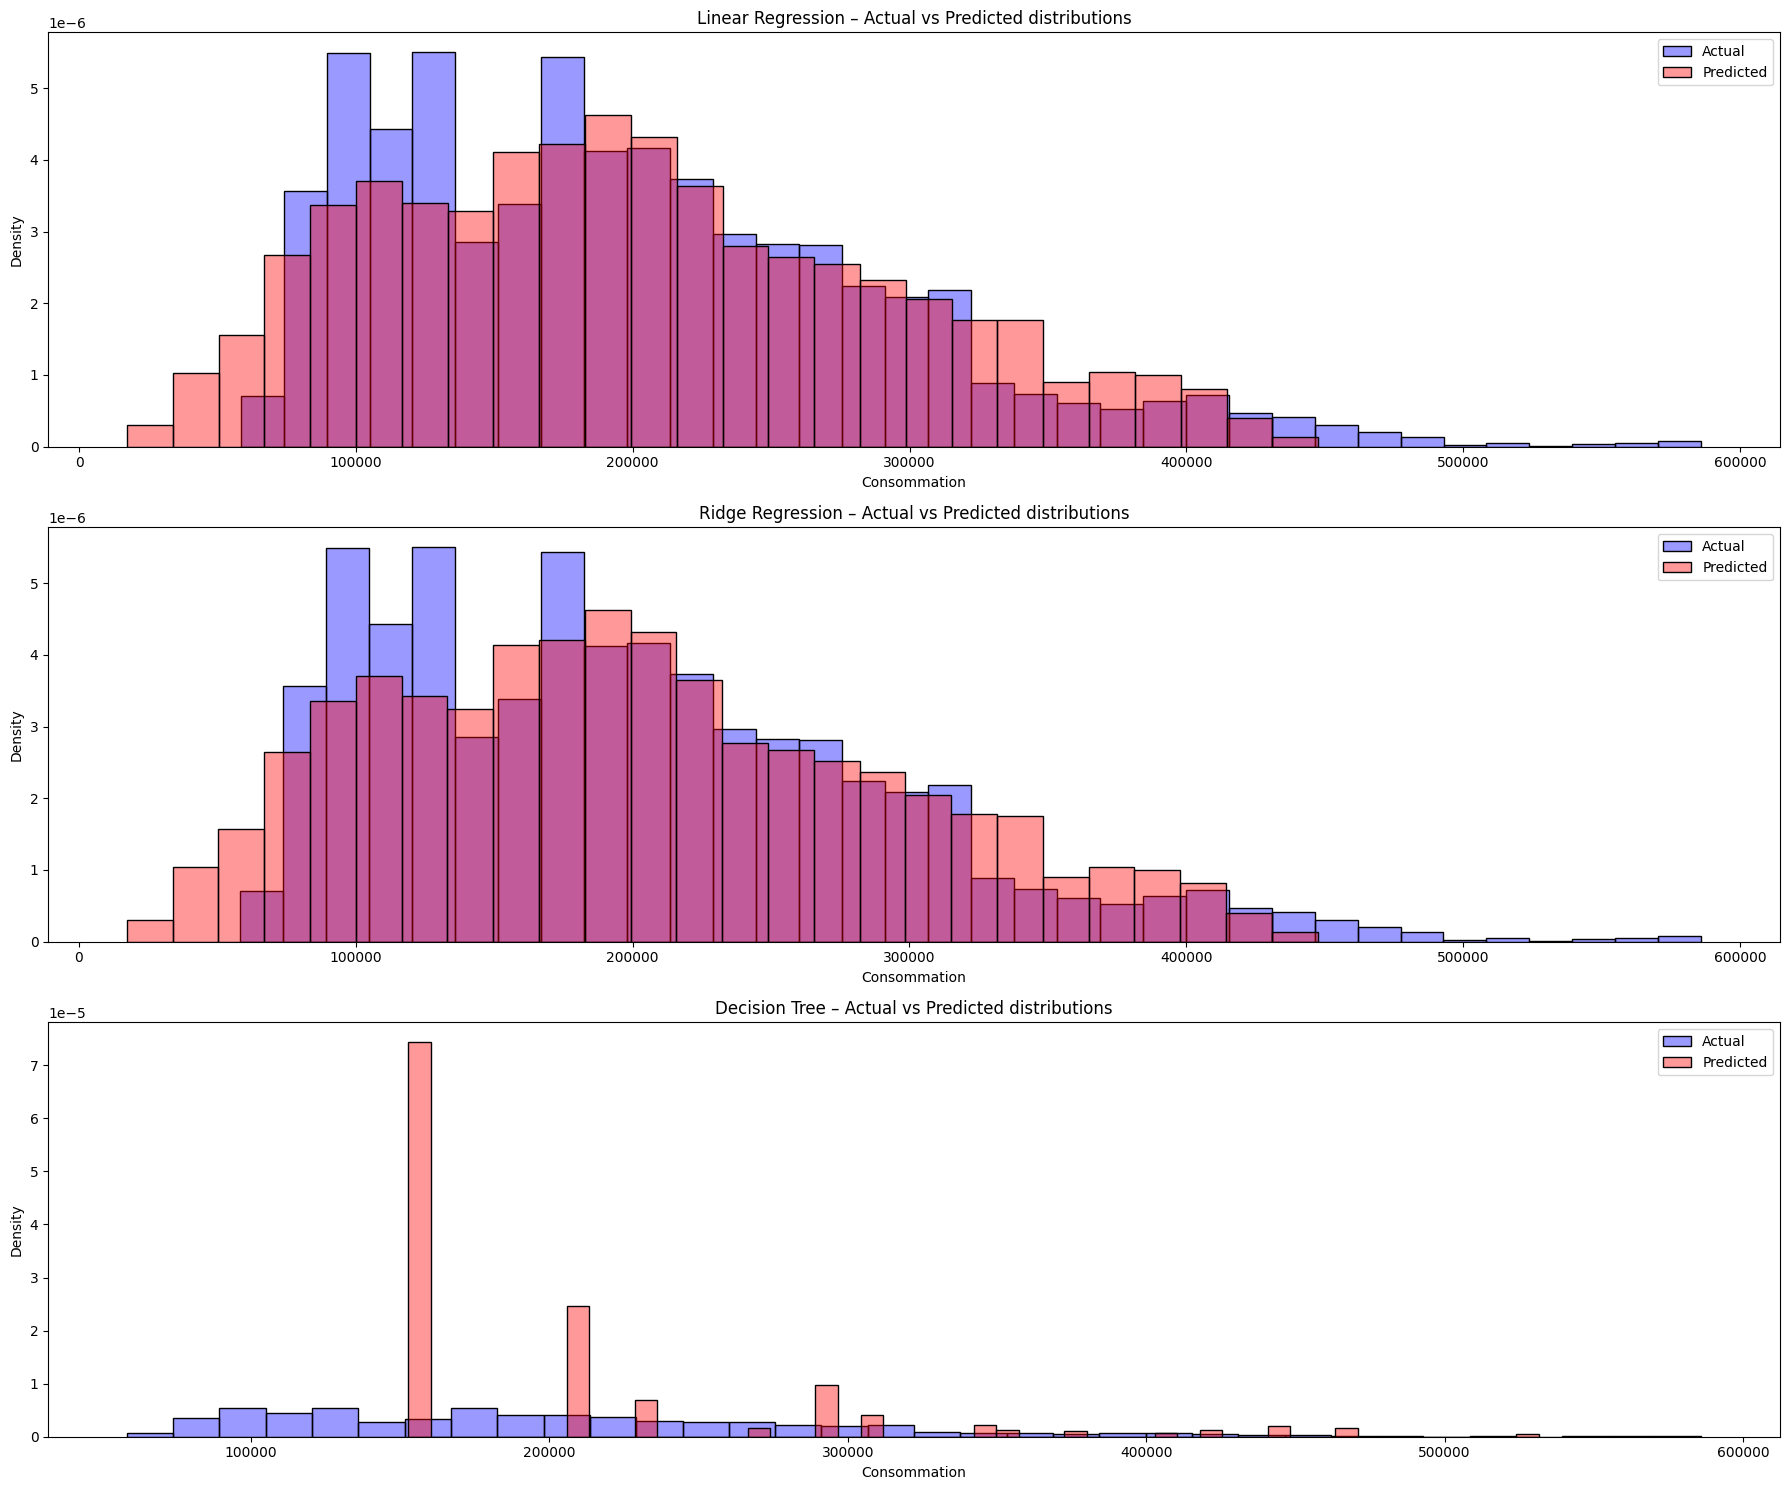

In [51]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15))

# Linear Regression
sns.histplot(y_test, ax=ax[0],stat = 'density', color="blue", alpha=0.4, label="Actual")
sns.histplot(y_pred_lin, ax=ax[0],stat ='density', color="red", alpha=0.4, label="Predicted")
ax[0].set_title("Linear Regression – Actual vs Predicted distributions")
ax[0].legend()

# Ridge Regression
sns.histplot(y_test, ax=ax[1], stat="density", color="blue", alpha=0.4, label="Actual")
sns.histplot(ridge_predictions, ax=ax[1], stat="density", color="red", alpha=0.4, label="Predicted")
ax[1].set_title("Ridge Regression – Actual vs Predicted distributions")
ax[1].legend()

# Decision Tree
sns.histplot(y_test, ax=ax[2], stat="density", color="blue", alpha=0.4, label="Actual")
sns.histplot(y_pred_tree, ax=ax[2], stat="density", color="red", alpha=0.4, label="Predicted")
ax[2].set_title("Decision Tree – Actual vs Predicted distributions")
ax[2].legend()

plt.tight_layout()


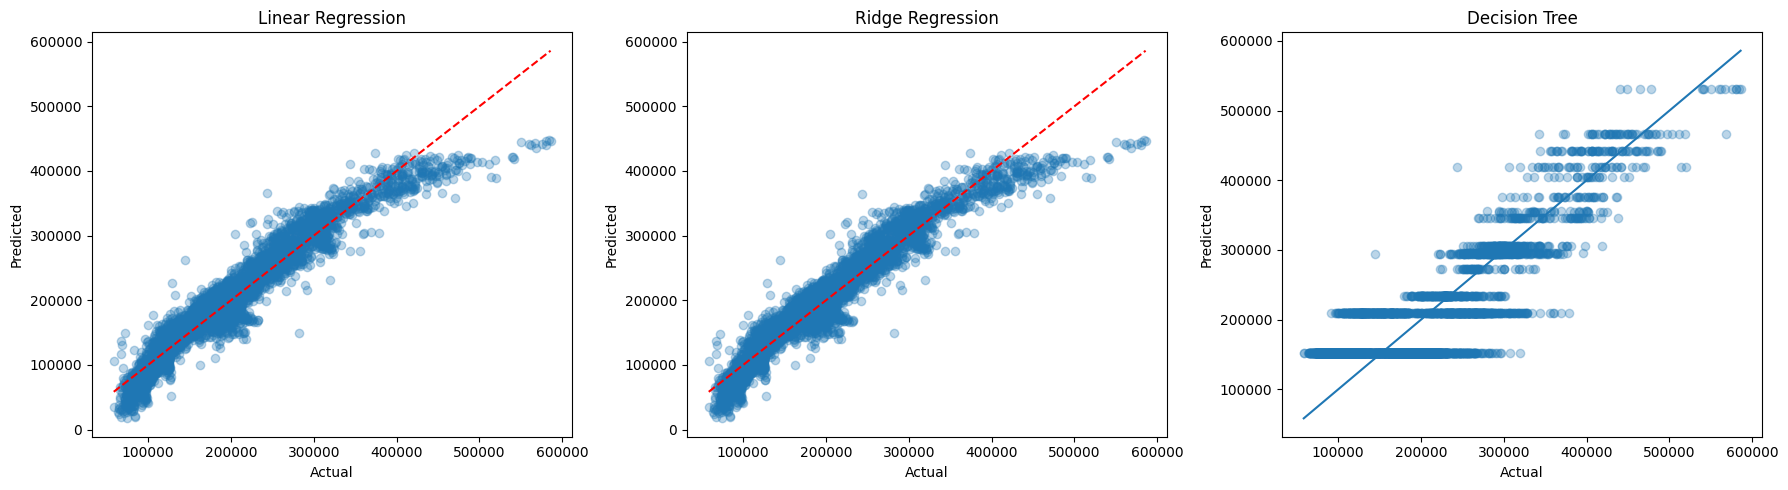

In [52]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Linear
ax[0].scatter(y_test, y_pred_lin, alpha=0.3)
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
ax[0].set_title("Linear Regression")
ax[0].set_xlabel("Actual")
ax[0].set_ylabel("Predicted")

# Ridge
ax[1].scatter(y_test, ridge_predictions, alpha=0.3)
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
ax[1].set_title("Ridge Regression")
ax[1].set_xlabel("Actual")
ax[1].set_ylabel("Predicted")

# Tree
ax[2].scatter(y_test, y_pred_tree, alpha=0.3)
ax[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
ax[2].set_title("Decision Tree")
ax[2].set_xlabel("Actual")
ax[2].set_ylabel("Predicted")

plt.tight_layout()


In [55]:
new_day = pd.DataFrame([{
    "ALLSKY_SFC_SW_DWN": 5.494,
    "CLRSKY_SFC_SW_DWN": 6.860,
    "GWETROOT": 0.76,
    "PS": 97.706,
    "QV2M": 0.007,
    "RH2M": 70,
    "T2M_RANGE": 5.310,
    "month": 1,
    "is_weekend": 0, # No
    "saison": 0,      # Winter
    "Regions": "Auvergne-Rhône-Alpes"
}])
predicted = ridge_model.predict(new_day)
print("Predicted consumption (MWh):", predicted[0])

Predicted consumption (MWh): 432787.4834827592
